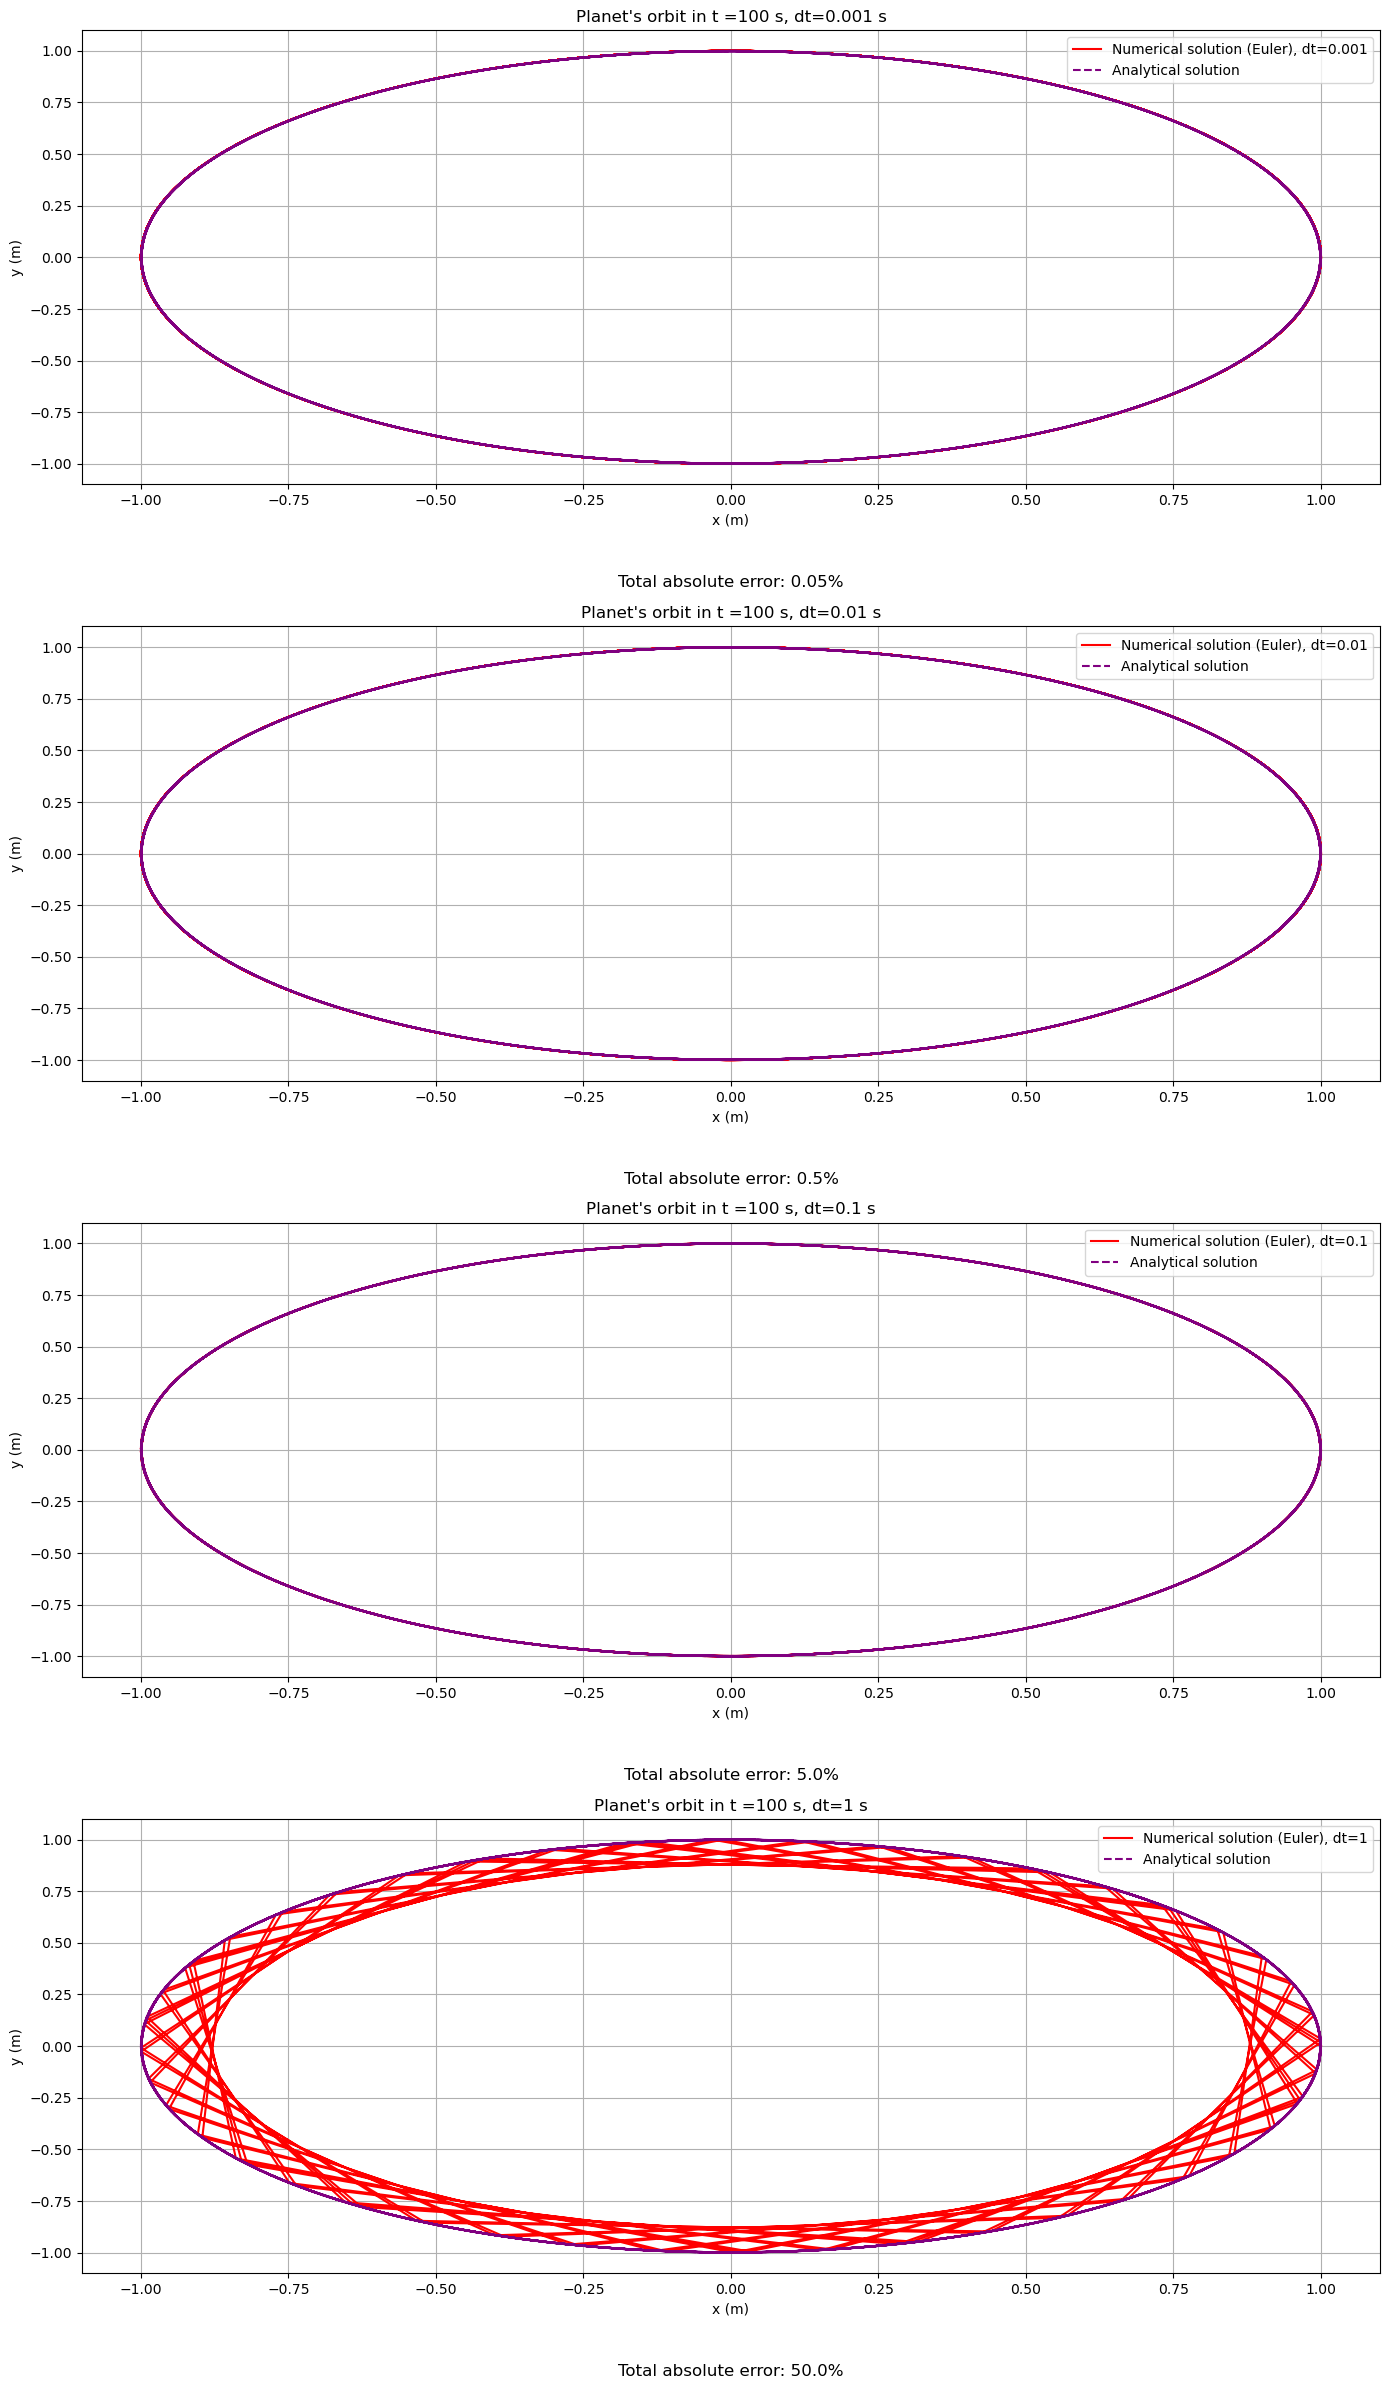

In [14]:
import numpy as np
import matplotlib.pyplot as plt

G = 1
M = 1 
m = 1
R = 1


valores_dt = [0.001, 0.01, 0.1,  1]  
tiempo_total =100
fig, axes = plt.subplots(len(valores_dt), 1, figsize=(14, 6 * len(valores_dt)))

for i, dt in enumerate(valores_dt):
    r=R
    phi=0
    v_phi=np.sqrt(G*M/r)
    deri_phi = v_phi/r
    deri_r = 0
    l=m*r**2*deri_phi

    pasos = int(tiempo_total / dt) 
    valores_r, valores_phi = [], []   

    for _ in range(pasos):
        valores_r.append(r)
        valores_phi.append(phi)
        
        deri_phi = l/(m*r**2)
        phi += deri_phi * dt
        
        a_r = l**2/(m**2 *r**3) - G*M/r**2
        deri_r += a_r*dt
        r += deri_r*dt
        

    
    valores_phi = np.array(valores_phi)
    valores_r = np.array(valores_r)
        
    tiempoan = np.linspace(0, tiempo_total, 1000)
    phi_an = np.sqrt(G*M/R**3)*tiempoan
    r_an = R
    
    
    phi_an_inter = np.interp(np.linspace(0, tiempo_total, len(valores_phi)), tiempoan, phi_an)
    #r_an_inter = np.interp(np.linspace(0, tiempo_total, len(valores_r)), tiempoan, r_an)


    error_r = np.abs(valores_r - r_an)
    error_phi = np.abs(valores_phi - phi_an_inter)
    error_total_absoluto = np.mean(error_r + error_phi)
    

    ax = axes[i]
    ax.plot(valores_r * np.cos(valores_phi), valores_r * np.sin(valores_phi), label=f'Numerical solution (Euler), dt={dt}', color='red')
    ax.plot(r_an * np.cos(phi_an), r_an * np.sin(phi_an), label='Analytical solution', linestyle='--', color='purple')
    ax.set_xlabel('x (m)')
    ax.set_ylabel('y (m)')
    ax.set_title(f'Planet\'s orbit in t ={tiempo_total} s, dt={dt} s')
    ax.legend()
    ax.grid(True)
    
    
    ax.text(0.5, -0.2, 
            f'Total absolute error: {round(error_total_absoluto * 100, 2)}%',
            transform=ax.transAxes,
            fontsize=12,
            verticalalignment='top',
            horizontalalignment='center')    

plt.subplots_adjust(hspace=0.01)
plt.tight_layout()
plt.show()














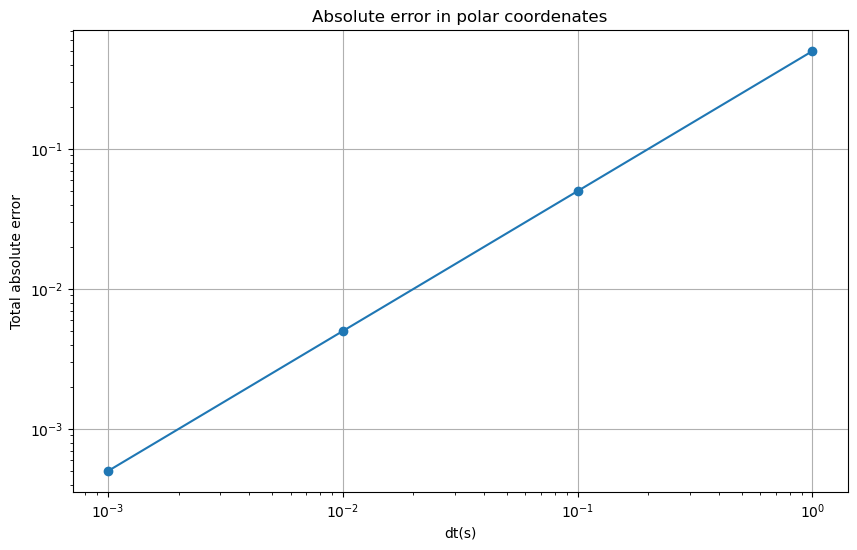

In [36]:
import numpy as np
import matplotlib.pyplot as plt

G = 1
M = 1 
m = 1
R = 1

errores_totales = []

valores_dt = [0.001, 0.01, 0.1,  1]  
tiempo_total =100

for i, dt in enumerate(valores_dt):
    r=R
    phi=0
    v_phi=np.sqrt(G*M/r)
    deri_phi = v_phi/r
    deri_r = 0
    l=m*r**2*deri_phi

    pasos = int(tiempo_total / dt) 
    valores_r, valores_phi = [], []   

    for _ in range(pasos):
        valores_r.append(r)
        valores_phi.append(phi)
        
        deri_phi = l/(m*r**2)
        phi += deri_phi * dt
        
        a_r = l**2/(m**2 *r**3) - G*M/r**2
        deri_r += a_r*dt
        r += deri_r*dt
        

    
    valores_phi = np.array(valores_phi)
    valores_r = np.array(valores_r)
        
    tiempoan = np.linspace(0, tiempo_total, 1000)
    phi_an = np.sqrt(G*M/R**3)*tiempoan
    r_an = R
    
    
    phi_an_inter = np.interp(np.linspace(0, tiempo_total, len(valores_phi)), tiempoan, phi_an)


    error_r = np.abs(valores_r - r_an)
    error_phi = np.abs(valores_phi - phi_an_inter)
    error_total_absoluto = np.mean(error_r + error_phi)

    errores_totales.append(error_total_absoluto)

plt.figure(figsize=(10, 6))
plt.loglog(valores_dt, errores_totales, marker='o', linestyle='-')
plt.xlabel('dt(s)')
plt.ylabel('Total absolute error')
plt.title('Absolute error in polar coordenates')
plt.grid(True)
plt.show()













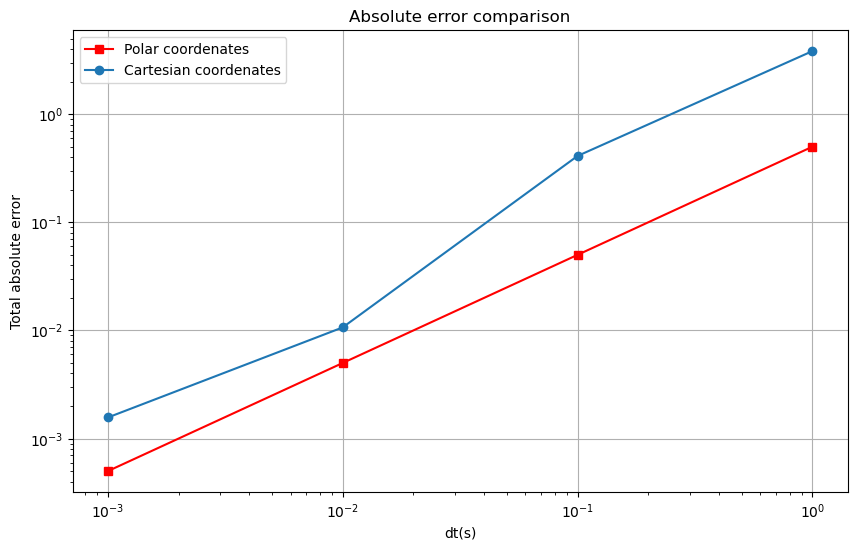

In [37]:
import numpy as np
import matplotlib.pyplot as plt

G = 1
M = 1 
m = 1
R = 1

errores_totales_polares = []

valores_dt = [0.001, 0.01, 0.1,  1]  
tiempo_total =100

for i, dt in enumerate(valores_dt):
    r=R
    phi=0
    v_phi=np.sqrt(G*M/r)
    deri_phi = v_phi/r
    deri_r = 0
    l=m*r**2*deri_phi

    pasos = int(tiempo_total / dt) 
    valores_r, valores_phi = [], []   

    for _ in range(pasos):
        valores_r.append(r)
        valores_phi.append(phi)
        
        deri_phi = l/(m*r**2)
        phi += deri_phi * dt
        
        a_r = l**2/(m**2 *r**3) - G*M/r**2
        deri_r += a_r*dt
        r += deri_r*dt
        

    
    valores_phi = np.array(valores_phi)
    valores_r = np.array(valores_r)
        
    tiempoan = np.linspace(0, tiempo_total, 1000)
    phi_an = np.sqrt(G*M/R**3)*tiempoan
    r_an = R
    
    
    phi_an_inter = np.interp(np.linspace(0, tiempo_total, len(valores_phi)), tiempoan, phi_an)


    error_r = np.abs(valores_r - r_an)
    error_phi = np.abs(valores_phi - phi_an_inter)
    error_total_absoluto = np.mean(error_r + error_phi)

    errores_totales_polares.append(error_total_absoluto)




G = 1
M = 1        
R = 1         
V0 = np.sqrt(G*M/R)  

errores_totales_cartesianos = []


for i, dt in enumerate(valores_dt):
    x = R
    y = 0
    vx = 0
    vy = V0

    pasos = int(tiempo_total / dt) 
    valores_x, valores_y = [], []        

    for _ in range(pasos):
        valores_x.append(x)
        valores_y.append(y)
        
        r = np.sqrt(x**2 + y**2)
        ax = -G * M * x / r**3
        ay = -G * M * y / r**3
        vx += ax * dt
        vy += ay * dt
        x += vx * dt
        y += vy * dt
    
    valores_x, valores_y  = np.array(valores_x), np.array(valores_y)
    
    tiempoan = np.linspace(0, tiempo_total, 1000)

    x_an = R * np.cos(tiempoan * V0 / R)
    y_an = R * np.sin(tiempoan * V0 / R)

    nvalores = len(valores_x)
    x_an_inter = np.interp(np.linspace(0, tiempo_total, nvalores), tiempoan, x_an)
    y_an_inter = np.interp(np.linspace(0, tiempo_total, nvalores), tiempoan, y_an)

    error_x = np.abs(valores_x - x_an_inter)
    error_y = np.abs(valores_y - y_an_inter)
    error_total_absoluto = np.mean(error_x + error_y)



    errores_totales_cartesianos.append(error_total_absoluto)

plt.figure(figsize=(10, 6))
plt.loglog(valores_dt, errores_totales_polares, marker='s', linestyle='-', color='red', label ='Polar coordenates')
plt.loglog(valores_dt, errores_totales_cartesianos, marker='o', linestyle='-', label = 'Cartesian coordenates')
plt.xlabel('dt(s)')
plt.ylabel('Total absolute error')
plt.title('Absolute error comparison')
plt.legend()
plt.grid(True)
plt.show()












